## Objective

To automate the process of Visual testing 

Visual Testing - 

In this process, we have to detect the missing or extra components on PCBs which comes from EMS side.
As there as more than 500 components on PCB, this will help to reduce the manpower and efficiency of process by
eliminating the manual error.

In [217]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [218]:
# reading image
img = cv2.imread("reference.jpg")

In [219]:
cv2.namedWindow('img1_pcb', cv2.WINDOW_NORMAL)
cv2.imshow("img1_pcb",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [220]:
img.shape

(2003, 3100, 3)

By this we know that image is RGB.

In [221]:
type(img)

numpy.ndarray

In [222]:
# resizing the image
img1 = cv2.resize(img,(1000,1000))

In [223]:
img1_flatten = img1.flatten()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


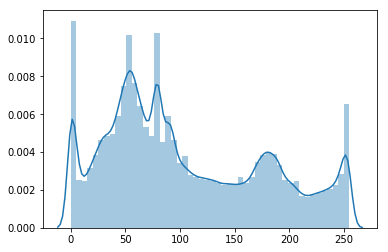

In [224]:
sns.distplot(img1_flatten , hist = True, bins = 50)

As background color of our PCB is green, so from this histogram we can find the threshold as 50 (color image).

In [225]:
img2 = cv2.imread("test_pcb.jpg")

In [226]:
cv2.namedWindow('img2_pcb', cv2.WINDOW_NORMAL)
cv2.imshow("img2_pcb",img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [227]:
img2.shape

(2003, 3100, 3)

In [228]:
img2 = cv2.resize(img2,(1000,1000))

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


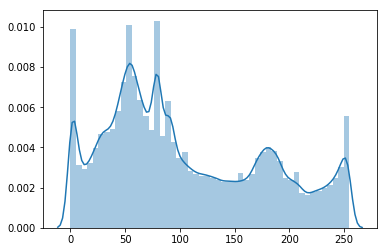

In [229]:
img2_flatten = img2.flatten()

sns.distplot(img2_flatten , hist = True, bins = 50)

As background color of our PCB is green, so from this histogram we can find the threshold as 50 (color image).

In [230]:
# convert color image into grayscale 
graymask = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [231]:
graymask.shape

(1000, 1000)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


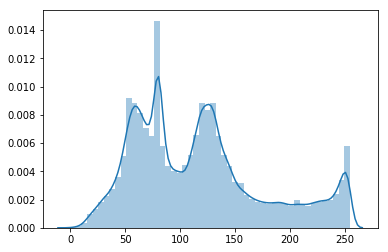

In [232]:
graymask_flatten = graymask.flatten()

sns.distplot(graymask_flatten , hist = True, bins = 50)

Our image (gray scale) threshold is 75.

In [233]:
gray.shape

(1000, 1000)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


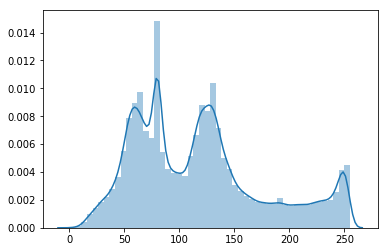

In [234]:
gray_flatten = gray.flatten()

sns.distplot(gray_flatten , hist = True, bins = 50)

Our image (gray scale) threshold is 75.

In [235]:
# Do binary threshold on image
retval, mask_img = cv2.threshold(gray, 75, 255, cv2.THRESH_BINARY)

# Display the image
cv2.namedWindow('pcb1', cv2.WINDOW_NORMAL)
cv2.imshow("pcb1",mask_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [236]:
retval1, mask_img1 = cv2.threshold(graymask, 75, 255, cv2.THRESH_BINARY)

cv2.namedWindow('pcb2', cv2.WINDOW_NORMAL)
cv2.imshow("pcb2",mask_img1)
cv2.waitKey()
cv2.destroyAllWindows()

In [237]:
# XORing the grayscale images
result = cv2.bitwise_xor(mask_img,mask_img1)

In [238]:
cv2.namedWindow('final_pcb', cv2.WINDOW_NORMAL)
cv2.imshow("final_pcb",result)
cv2.waitKey()
cv2.destroyAllWindows()

In [239]:
# Applying median filter on resultant image
filtered_image = cv2.medianBlur(result,5)

In [240]:
# Display final image
cv2.namedWindow('final_pcb', cv2.WINDOW_NORMAL)
cv2.imshow("final_pcb",filtered_image)
cv2.waitKey()
cv2.destroyAllWindows()